In [13]:
import pandas as pd

# Load dataset
file_path = r"C:\Users\ADMIN\Desktop\pizza\pizza_sales.csv"
df = pd.read_csv(file_path)

# Show first few rows
print("First 5 rows:\n", df.head())


First 5 rows:
    pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0       1.0       1.0     hawaiian_m       1.0   1/1/2015   11:38:36   
1       2.0       2.0  classic_dlx_m       1.0   1/1/2015   11:57:40   
2       3.0       2.0  five_cheese_l       1.0   1/1/2015   11:57:40   
3       4.0       2.0    ital_supr_l       1.0   1/1/2015   11:57:40   
4       5.0       2.0     mexicana_m       1.0   1/1/2015   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked 

In [15]:
# Shape & column names
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# Data types & non-null counts
print("\nInfo:")
print(df.info())


Dataset Shape: (48620, 12)

Columns: ['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date', 'order_time', 'unit_price', 'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  objec

# Check for Missing Values

In [17]:
# Missing values count
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64


In [20]:
# Count duplicates
duplicate_count = df.duplicated().sum()
print("\nDuplicate rows:", duplicate_count)

# Remove duplicates if needed
df = df.drop_duplicates()



Duplicate rows: 0


In [24]:
# Numerical summary
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
           pizza_id      order_id      quantity    unit_price   total_price
count  48620.000000  48620.000000  48620.000000  48620.000000  48620.000000
mean   24310.500000  10701.479761      1.019622     16.494132     16.821474
std    14035.529381   6180.119770      0.143077      3.621789      4.437398
min        1.000000      1.000000      1.000000      9.750000      9.750000
25%    12155.750000   5337.000000      1.000000     12.750000     12.750000
50%    24310.500000  10682.500000      1.000000     16.500000     16.500000
75%    36465.250000  16100.000000      1.000000     20.250000     20.500000
max    48620.000000  21350.000000      4.000000     35.950000     83.000000


In [30]:
df['order_date'] = pd.to_datetime(df['order_date'], format="%d/%m/%Y", errors='coerce')
# Save cleaned version for Phase 2
cleaned_path =r"C:\Users\ADMIN\Desktop\pizza\pizza_sales_clean.csv"
df.to_csv(cleaned_path, index=False)
print("\nCleaned dataset saved at:", cleaned_path)



Cleaned dataset saved at: C:\Users\ADMIN\Desktop\pizza\pizza_sales_clean.csv


📊 CORE KPIs:
Total Revenue: $817,860.05
Total Orders: 21350
Average Order Value: $38.31
Total Pizzas Sold: 49574.0
Average Pizzas per Order: 2.32

🏆 Top 5 Best-Selling Pizzas:
pizza_name
The Classic Deluxe Pizza      2453.0
The Barbecue Chicken Pizza    2432.0
The Hawaiian Pizza            2422.0
The Pepperoni Pizza           2418.0
The Thai Chicken Pizza        2371.0
Name: quantity, dtype: float64

🚫 Bottom 5 Worst-Selling Pizzas:
pizza_name
The Soppressata Pizza        961.0
The Spinach Supreme Pizza    950.0
The Calabrese Pizza          937.0
The Mediterranean Pizza      934.0
The Brie Carre Pizza         490.0
Name: quantity, dtype: float64


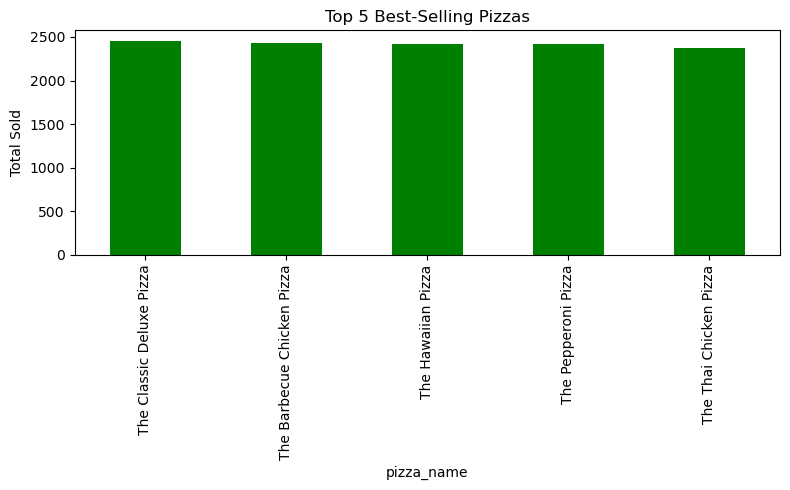

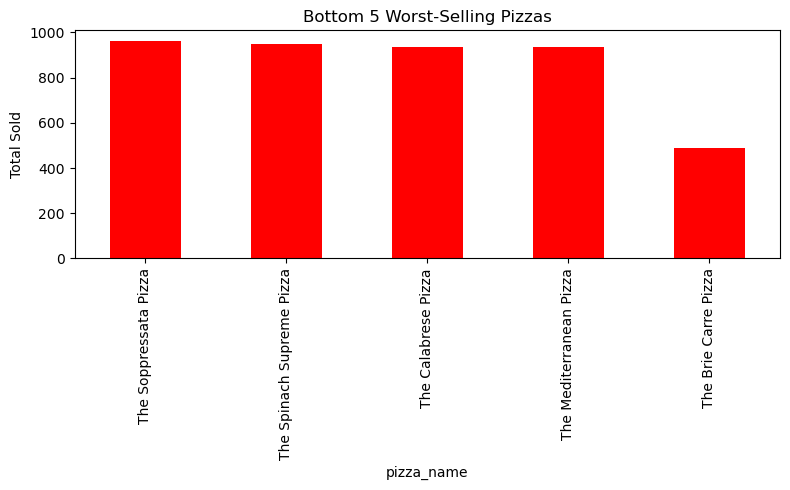

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load cleaned dataset
file_path = r"C:\Users\ADMIN\Desktop\pizza\pizza_sales_clean.csv"
df = pd.read_csv(file_path)

# ✅ Convert date column
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# ---------- 1. Core KPIs ----------
total_revenue = df['total_price'].sum()
total_orders = df['order_id'].nunique()
avg_order_value = total_revenue / total_orders
total_pizzas_sold = df['quantity'].sum()
avg_pizzas_per_order = total_pizzas_sold / total_orders

print("📊 CORE KPIs:")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value: ${avg_order_value:,.2f}")
print(f"Total Pizzas Sold: {total_pizzas_sold}")
print(f"Average Pizzas per Order: {avg_pizzas_per_order:.2f}")

# ---------- 5. Best & Worst Selling Pizzas ----------
pizza_sales = df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False)

top_5 = pizza_sales.head(5)
bottom_5 = pizza_sales.tail(5)

print("\n🏆 Top 5 Best-Selling Pizzas:")
print(top_5)

print("\n🚫 Bottom 5 Worst-Selling Pizzas:")
print(bottom_5)

# Plot best sellers
plt.figure(figsize=(8,5))
top_5.plot(kind='bar', color='green')
plt.title("Top 5 Best-Selling Pizzas")
plt.ylabel("Total Sold")
plt.tight_layout()
plt.show()

# Plot worst sellers
plt.figure(figsize=(8,5))
bottom_5.plot(kind='bar', color='red')
plt.title("Bottom 5 Worst-Selling Pizzas")
plt.ylabel("Total Sold")
plt.tight_layout()
plt.show()


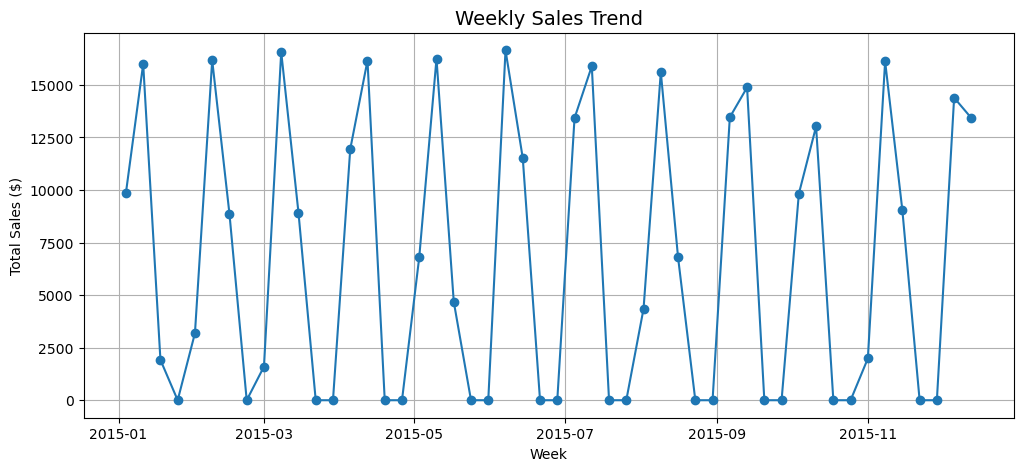

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9892\513554477.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='order_date', freq='M'))['total_price'].sum()


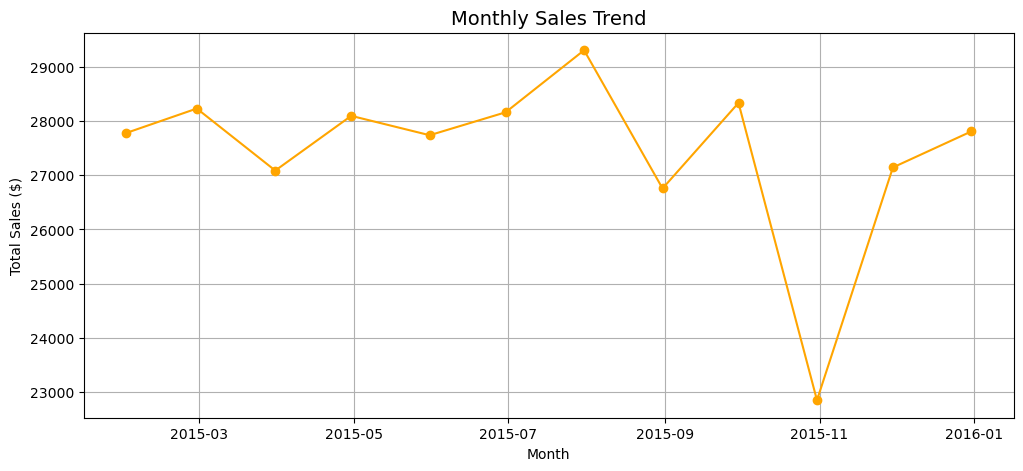

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = r"C:\Users\ADMIN\Desktop\pizza\pizza_sales_clean.csv"
df = pd.read_csv(file_path)

# ✅ Convert order_date to datetime with correct format
df['order_date'] = pd.to_datetime(df['order_date'], format="%d/%m/%Y", errors='coerce')

# ---------- Weekly Sales Trend ----------
weekly_sales = df.groupby(pd.Grouper(key='order_date', freq='W'))['total_price'].sum()

plt.figure(figsize=(12,5))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o')
plt.title("Weekly Sales Trend", fontsize=14)
plt.xlabel("Week")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.show()

# ---------- Monthly Sales Trend ----------
monthly_sales = df.groupby(pd.Grouper(key='order_date', freq='M'))['total_price'].sum()

plt.figure(figsize=(12,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='orange')
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.show()
